In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd

# 1. Hessian Test for Local Minimum, Maximum, and Saddle Points

*(Hessian Test, or Second Partial Derivative Test for $\mathbb{R}^{2}$)* 

*Let $f:\mathbb{R}^{2}\to\mathbb{R}$ be $C^{2}$, $(x_{0},y_{0}) \in\mathbb{R}^{2}$, and $f'(x_{0},y_{0}) = 0$. If $\mathbf{H}f(x_{0},y_{0})$ is positive definite, then $f(x,y)$ attains a minimum at $(x_{0},y_{0})$; if $\mathbf{H}f(x_{0},y_{0})$ is negative definite, then $f(x,y)$ attains a maximum at $(x_{0},y_{0})$; if $\mathbf{H}f(x_{0},y_{0})$ is postive semi-definite, then $(x_{0},y_{0})$ is a saddle point for $f(x,y)$.*

### Example of the Hessian Test

Define $f:\mathbb{R}^{2}\to\mathbb{R}$ by $f(x,y) = x^{2} + y^{2}$. Setting $f(x,y) = 0$ shows that $(0,0)$ is a point of interest for us. In particular, we want to determine if for $(0,0)\in\mathbb{R}^{2}$, whether $f(x,y)$ has a local minimum, maximum, or saddle point. We will apply the *Hessian Test*. 

Seeing as $f(x,y)$ is a polynomial, it is clear that $f(x,y)$ is at least $C^{2}$, so by Clairaut's Theorem we know that the Hessian of $f$ should be symmetric. Additionally, we have that 
$$\mathbf{J}f = \begin{pmatrix}\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y}\end{pmatrix} = \begin{pmatrix}2x & 2y\end{pmatrix}$$
and furthermore, 
$$\mathbf{H}f = \begin{pmatrix}\frac{\partial^{2}f}{\partial x^{2}} & \frac{\partial^{2}f}{\partial x\partial y} \\ \frac{\partial^{2}f}{\partial y\partial x} & \frac{\partial^{2}f}{\partial y^{2}} \end{pmatrix} = \begin{pmatrix}2 & 0 \\ 0 & 2\end{pmatrix},$$
where $\mathbf{J}f$ is the Jacobian of $f(x,y)$. It then follows that $$\mathbf{J}f(0,0) = \begin{pmatrix}0 & 0\end{pmatrix},$$
so we know at our point of interest that the partial derivatives of $f$ are "non-changing," as required by the assumptions of the Hessian Test. Moreover, for $\mathbf{H}f(0,0)$ we have
$$\mathbf{H}f(0,0) = \begin{pmatrix}2 & 0 \\ 0 & 2\end{pmatrix}\implies f_{xx} > 0 \hspace{2mm} \text{and} \hspace{2mm} f_{yy} > 0 \implies \det(\mathbf{H}f(0,0)) > 0.$$
Thus, by the Hessian Test $f(x,y) = x^{2}+y^{2}$ attains a minimum at $(0,0)$, which is what we wanted to determine. 

<Figure size 432x288 with 0 Axes>

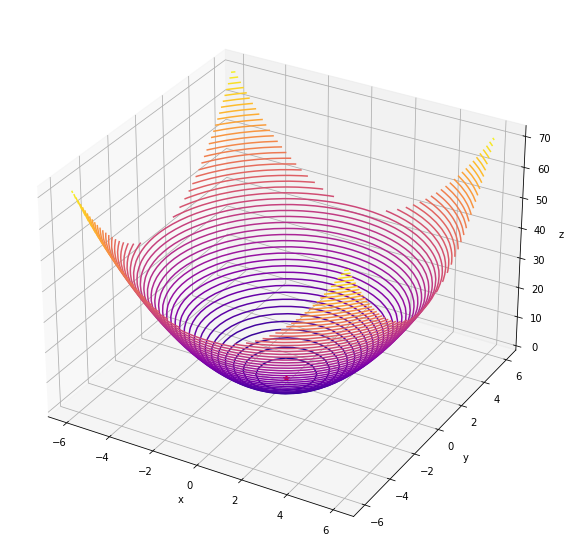

In [23]:
# plot of our function

def f(x,y):
    return x**2 + y**2

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='plasma')
ax.plot(0,0,'g*')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.show()

Interestingly, by the Hessian test the below figure should exemplify a saddle point.

<Figure size 432x288 with 0 Axes>

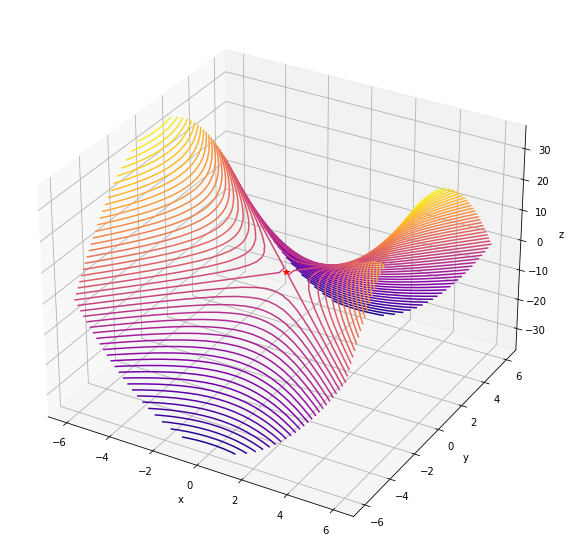

In [24]:
def f(x,y):
    return x**2 - y**2

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='plasma')
ax.plot(0,0,'g*')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.show()

While the above plot shows a possible saddle point at $(0,0)$, we should also be able to determine by the Hessian test that the variation $f(x,y) = -y^{2}-x^{2}$ has a maximum at $(0,0)$:

<Figure size 432x288 with 0 Axes>

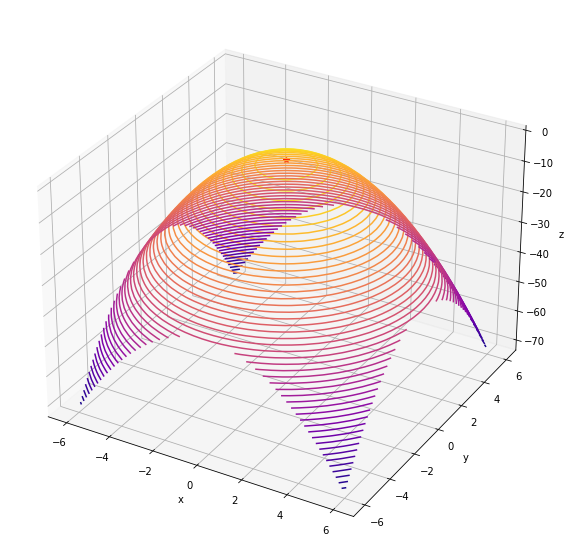

In [28]:
def f(x,y):
    return -y**2 - x**2

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='plasma')
ax.plot(0,0,'r*')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.show()

# 2. Logistic Regression

Below is an example of an application of logistic regression, where we use the following datase, obtained from https://www.kaggle.com/fivethirtyeight/the-ultimate-halloween-candy-power-ranking/, to determine the probability of getting chocolate candy. 

In [74]:
candy_data = pd.read_csv(r'/Users/joshuaclugston/Desktop/candy-data.csv')
candy_data

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [75]:
candy_data.isnull() # check to see if any values are missing 

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,False,False,False,False,False,False,False,False,False,False,False,False,False
81,False,False,False,False,False,False,False,False,False,False,False,False,False
82,False,False,False,False,False,False,False,False,False,False,False,False,False
83,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

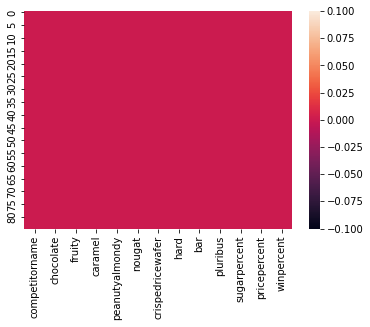

In [76]:
import seaborn as sns
sns.heatmap(candy_data.isnull()) # ensure that we are not missing any values by visualizing with heatmap

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X = candy_data[["winpercent"]] # our dependent variable
y = candy_data['chocolate'] # our independent variable

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [79]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [80]:
cm = confusion_matrix(y_test, y_pred)
print(cm, '\n')
print(classification_report(y_test,y_pred))

[[11  2]
 [ 3  6]] 

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.75      0.67      0.71         9

    accuracy                           0.77        22
   macro avg       0.77      0.76      0.76        22
weighted avg       0.77      0.77      0.77        22



<AxesSubplot:xlabel='winpercent', ylabel='chocolate'>

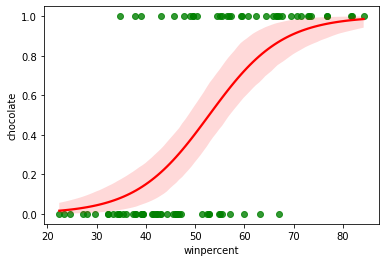

In [88]:
sns.regplot(x=X, y=y, data=candy_data, logistic=True, ci=95,scatter_kws={'color': 'green'}, 
            line_kws={'color': 'red'}) # plot with 95% confidence interval